In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

In [4]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
income_descr=DescrStatsW(df['Annual Income (k$)'])


In [13]:
age_descr=DescrStatsW(df['Age'])

## Calculating Quantile range

In [14]:
q1_income=income_descr.quantile(0.25)
q3income=income_descr.quantile(0.75)

In [15]:
q1_income

p
0.25    41
dtype: int64

In [16]:
q3income

p
0.75    78
dtype: int64

In [17]:
type(q1_income)

pandas.core.series.Series

In [18]:
iqr_income=q3income.loc[0.75]-q1_income.loc[0.25]

In [19]:
iqr_income

37

## In scipy Library have built in function stats.iqr for caluculating inter quantile range

In [23]:
stats.iqr(df['Annual Income (k$)'])

36.5

### ther is differnce of inter quantile range calculated by stats model is 37 and 36.5 when use stats.iqr function 
##### this is because when you calculating percentile value here in the iqr range either q1 or q3 percentile boundary lies between two data points .if this is the case the iqr function in the stats model performs some kind of interpolation to calculate the percantile value and default is linear percentaile.
* so if i anf g are the two data points at a percetaile boundary linear interpolation find a fractional part of the two data point 
* you can also explictly give how value can be interpolate

In [28]:
stats.iqr(df['Annual Income (k$)'],interpolation='lower')

38

In [29]:
stats.iqr(df['Annual Income (k$)'],interpolation='higher')

36

In [30]:
stats.iqr(df['Annual Income (k$)'],interpolation='midpoint')

37.0

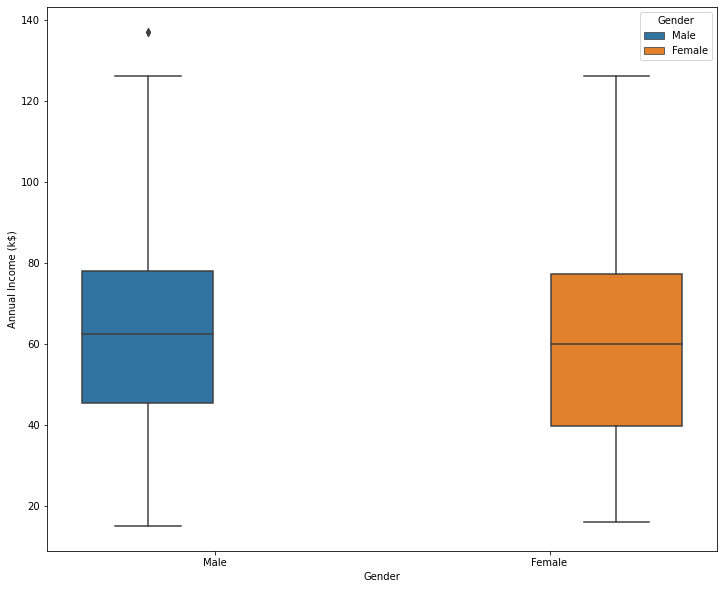

In [35]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Gender',y='Annual Income (k$)',hue='Gender',data=df,orient='v')

## Here you see there is no diff. b/w annual income with respect to gender

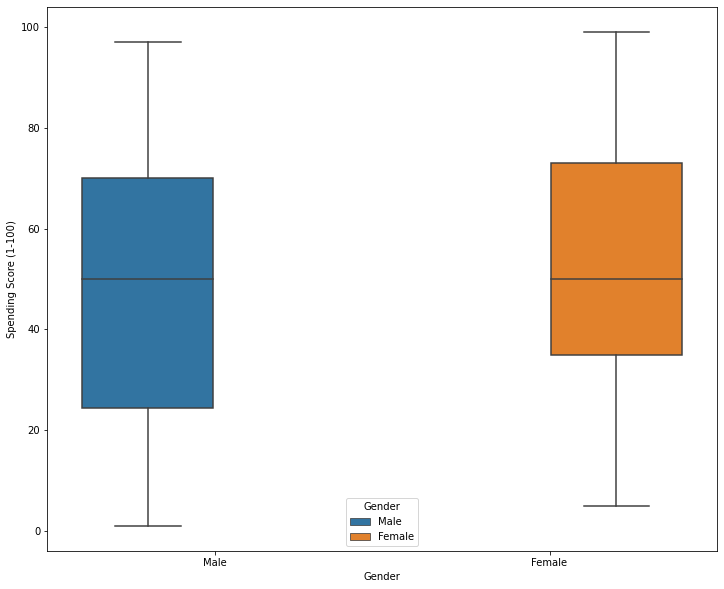

In [36]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Gender',y='Spending Score (1-100)',hue='Gender',data=df,orient='v')

## Once again no real difference

### VARIANCE

In [41]:
income_descr.var

686.3864

In [42]:
age_descr.var

194.1575

In [43]:
stats.describe(df['Annual Income (k$)'])

DescribeResult(nobs=200, minmax=(15, 137), mean=60.56, variance=689.8355778894472, skewness=0.319423684276314, kurtosis=-0.1258928297475106)

In [45]:
stats.describe(df['Age'])

DescribeResult(nobs=200, minmax=(18, 70), mean=38.85, variance=195.13316582914572, skewness=0.48191947090957177, kurtosis=-0.6847513947723236)